# Data Preprocessing untuk IndoBERT
## Sistem Verifikasi Administratif Otomatis Proposal Startup

Pipeline preprocessing untuk mempersiapkan data proposal startup sebelum diproses dengan model IndoBERT.

In [3]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [46]:
dataset_path = 'dataset/dataset_segmentasi_proposal.csv'

df = pd.read_csv(dataset_path)

df.head()

,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,parsing_status
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,Success
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,Success
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,Success
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",Success
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",Partial


## 1. Explorasi Data Awal

In [47]:
# Cek informasi dataset
print("="*60)
print("INFORMASI DATASET")
print("="*60)
print(f"Jumlah data: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]}")
print(f"\nKolom dataset:")
print(df.columns.tolist())
print("\n" + "="*60)
df.info()

INFORMASI DATASET
Jumlah data: 50
Jumlah fitur: 11

Kolom dataset:
['id_segmentasi', 'id_tenant', 'txt_latar_belakang', 'txt_noble_purpose', 'txt_konsumen', 'txt_produk_inovatif', 'txt_strategi_pemasaran', 'txt_sumber_daya', 'txt_keuangan_narrative', 'txt_rab_narrative', 'parsing_status']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_segmentasi           50 non-null     int64 
 1   id_tenant               50 non-null     int64 
 2   txt_latar_belakang      50 non-null     object
 3   txt_noble_purpose       50 non-null     object
 4   txt_konsumen            50 non-null     object
 5   txt_produk_inovatif     50 non-null     object
 6   txt_strategi_pemasaran  50 non-null     object
 7   txt_sumber_daya         50 non-null     object
 8   txt_keuangan_narrative  50 non-null     object
 9   txt_rab_narrative       50 no

In [48]:
# Identifikasi kolom teks (bagian proposal)
text_columns = [col for col in df.columns if col.startswith('txt_')]

print(f"Kolom teks proposal: {len(text_columns)}")
print("\nDaftar bagian proposal:")
for i, col in enumerate(text_columns, 1):
    col_name = col.replace('txt_', '').replace('_', ' ').title()
    print(f"{i}. {col_name}")

Kolom teks proposal: 8

Daftar bagian proposal:
1. Latar Belakang
2. Noble Purpose
3. Konsumen
4. Produk Inovatif
5. Strategi Pemasaran
6. Sumber Daya
7. Keuangan Narrative
8. Rab Narrative


## 2. Handling Missing Values

In [49]:
# Cek missing values di kolom teks
print("="*60)
print("MISSING VALUES - Kolom Teks")
print("="*60)
missing_text = df[text_columns].isnull().sum()
missing_text_pct = (missing_text / len(df)) * 100

missing_summary = pd.DataFrame({
    'Kolom': missing_text.index,
    'Missing Count': missing_text.values,
    'Persentase (%)': missing_text_pct.values
})

if missing_summary['Missing Count'].sum() > 0:
    print(missing_summary[missing_summary['Missing Count'] > 0].to_string(index=False))
else:
    print("✅ Tidak ada missing values di kolom teks!")

MISSING VALUES - Kolom Teks
✅ Tidak ada missing values di kolom teks!


In [50]:
# Fill missing values dengan string kosong
df_clean = df.copy()
for col in text_columns:
    df_clean[col] = df_clean[col].fillna('').astype(str)

print("✅ Missing values telah dihandle dengan string kosong")
print(f"Total data setelah cleaning: {len(df_clean)}")

✅ Missing values telah dihandle dengan string kosong
Total data setelah cleaning: 50


## 3. Text Cleaning Function

In [9]:
def clean_text(text):
    """
    Membersihkan teks untuk preprocessing IndoBERT.
    
    Steps:
    1. Hapus karakter non-alphanumeric kecuali spasi dan tanda baca penting
    2. Normalisasi whitespace (hapus multiple spaces, tabs, newlines)
    3. Trim leading/trailing whitespace
    4. Lowercase (opsional, tergantung model IndoBERT yang digunakan)
    
    Args:
        text (str): Raw text
        
    Returns:
        str: Cleaned text
    """
    if not isinstance(text, str) or text.strip() == '':
        return ''
    
    # 1. Hapus URL
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 2. Hapus email
    text = re.sub(r'\S+@\S+', '', text)
    
    # 3. Hapus nomor telepon (format Indonesia)
    text = re.sub(r'\+?62\d{9,12}|\d{10,12}', '', text)
    
    # 4. Hapus karakter khusus yang tidak diperlukan (keep: .,!?-)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\-]', ' ', text)
    
    # 5. Normalisasi whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # 6. Trim
    text = text.strip()
    
    # 7. Lowercase (opsional - IndoBERT biasanya case-sensitive)
    # Uncomment jika menggunakan uncased model
    # text = text.lower()
    
    return text

# Test function
sample_text = "Ini adalah contoh teks dengan URL: https://example.com dan email: test@mail.com!!! Nomor: 08123456789"
print("Original:", sample_text)
print("Cleaned:", clean_text(sample_text))

Original: Ini adalah contoh teks dengan URL: https://example.com dan email: test@mail.com!!! Nomor: 08123456789
Cleaned: Ini adalah contoh teks dengan URL dan email Nomor


## 4. Apply Cleaning ke Dataset

In [10]:
# Apply cleaning function ke semua kolom teks
print("Membersihkan teks...")
for col in text_columns:
    print(f"Processing: {col}")
    df_clean[col] = df_clean[col].apply(clean_text)

print("\n✅ Text cleaning selesai!")

# Cek contoh hasil cleaning
print("\n" + "="*60)
print("SAMPLE DATA SETELAH CLEANING")
print("="*60)
sample_col = text_columns[0]
print(f"Kolom: {sample_col}")
print(f"Before: {df[sample_col].iloc[0][:200]}...")
print(f"\nAfter: {df_clean[sample_col].iloc[0][:200]}...")

Membersihkan teks...
Processing: txt_latar_belakang
Processing: txt_noble_purpose
Processing: txt_konsumen
Processing: txt_produk_inovatif
Processing: txt_strategi_pemasaran
Processing: txt_sumber_daya
Processing: txt_keuangan_narrative
Processing: txt_rab_narrative

✅ Text cleaning selesai!

SAMPLE DATA SETELAH CLEANING
Kolom: txt_latar_belakang
Before: Antrian di puskesmas daerah Bandung rata-rata memakan waktu 3 jam. Banyak pasien lansia kelelahan menunggu. Sistem pendaftaran manual sering menyebabkan data hilang....

After: Antrian di puskesmas daerah Bandung rata-rata memakan waktu 3 jam. Banyak pasien lansia kelelahan menunggu. Sistem pendaftaran manual sering menyebabkan data hilang....


## 5. Gabungkan Semua Bagian Proposal

Untuk verifikasi administratif, kita akan menggabungkan semua bagian proposal menjadi satu teks utuh.

In [51]:
# Gabungkan semua bagian proposal dengan separator
def combine_proposal_sections(row):
    """
    Menggabungkan semua bagian proposal menjadi satu teks.
    Setiap bagian dipisahkan dengan [SEP] untuk mempertahankan struktur.
    """
    sections = []
    for col in text_columns:
        section_text = row[col]
        if section_text.strip():  # Hanya tambahkan jika tidak kosong
            # Format: [SECTION_NAME] teks
            section_name = col.replace('txt_', '').replace('_', ' ').upper()
            sections.append(f"[{section_name}] {section_text}")
    
    # Gabungkan dengan separator
    return " [SEP] ".join(sections)

# Apply ke dataset
df_clean['full_proposal'] = df_clean.apply(combine_proposal_sections, axis=1)

# Statistik panjang teks gabungan
print("="*60)
print("STATISTIK TEKS GABUNGAN")
print("="*60)
print(f"Rata-rata panjang (karakter): {df_clean['full_proposal'].str.len().mean():.0f}")
print(f"Median panjang (karakter): {df_clean['full_proposal'].str.len().median():.0f}")
print(f"Min panjang (karakter): {df_clean['full_proposal'].str.len().min():.0f}")
print(f"Max panjang (karakter): {df_clean['full_proposal'].str.len().max():.0f}")

# Sample output
print("\n" + "="*60)
print("SAMPLE FULL PROPOSAL")
print("="*60)
print(df_clean['full_proposal'].iloc[0][:500] + "...")

STATISTIK TEKS GABUNGAN
Rata-rata panjang (karakter): 577
Median panjang (karakter): 511
Min panjang (karakter): 389
Max panjang (karakter): 1215

SAMPLE FULL PROPOSAL
[LATAR BELAKANG] Antrian di puskesmas daerah Bandung rata-rata memakan waktu 3 jam. Banyak pasien lansia kelelahan menunggu. Sistem pendaftaran manual sering menyebabkan data hilang. [SEP] [NOBLE PURPOSE] Meningkatkan akses kesehatan masyarakat yang manusiawi dan efisien melalui teknologi, serta mengurangi beban administrasi tenaga medis. [SEP] [KONSUMEN] Target utama adalah pasien BPJS di area urban (Bandung Raya) usia 20-50 tahun yang tech-savvy, serta lansia yang didampingi keluarga. [SEP] [P...


In [52]:
df_clean.head()

,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,parsing_status,full_proposal
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,Success,[LATAR BELAKANG] Antrian di puskesmas daerah B...
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,Success,[LATAR BELAKANG] Meningkatnya obesitas di kala...
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,Success,[LATAR BELAKANG] Orang malas mencuci sepatu se...
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",Success,[LATAR BELAKANG] Tanah pertanian di Lembang ma...
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",Partial,[LATAR BELAKANG] Banyak limbah kain perca dari...


## 5a. Feature Engineering untuk Verifikasi Administratif

Ekstrak fitur-fitur untuk mendukung penilaian proposal berdasarkan **3 kriteria utama** yang telah digabungkan:
1. **Latar Belakang Usaha** (5%)
2. **Deskripsi Usaha** (85%) - Gabungan dari:
   - Noble Purpose (10%)
   - Identifikasi Konsumen (10%)
   - Produk Inovatif (25%)
   - Strategi Pemasaran (15%)
   - Sumber Daya (15%)
   - Laporan Keuangan (10%)
3. **RAB Produksi** (10%)

### Feature 1: Kelengkapan Dokumen (Completeness Score)

In [53]:
# Mapping kolom ke kriteria penilaian
# Sesuaikan dengan nama kolom di dataset Anda
KRITERIA_MAPPING = {
    'latar_belakang': ['txt_latar_belakang'],
    'deskripsi_usaha': ['txt_noble_purpose', 'txt_konsumen', 'txt_produk_inovatif', 'txt_strategi_pemasaran', 'txt_sumber_daya', 'txt_keuangan_narrative'],
    'rab': ['txt_rab_narrative']
}

# Identifikasi kolom yang ada di dataset
available_columns = set(df_clean.columns)
kriteria_columns_found = {}

for kriteria, possible_cols in KRITERIA_MAPPING.items():
    found = [col for col in possible_cols if col in available_columns]
    kriteria_columns_found[kriteria] = found if found else []

print("="*60)
print("MAPPING KRITERIA KE KOLOM DATASET")
print("="*60)
for kriteria, cols in kriteria_columns_found.items():
    print(f"\n{kriteria.upper()}:")
    if cols:
        for col in cols:
            print(f"  ✓ {col}")
    else:
        print(f"  ⚠️ Tidak ada kolom yang cocok - akan menggunakan heuristik alternatif")

MAPPING KRITERIA KE KOLOM DATASET

LATAR_BELAKANG:
  ✓ txt_latar_belakang

DESKRIPSI_USAHA:
  ✓ txt_noble_purpose
  ✓ txt_konsumen
  ✓ txt_produk_inovatif
  ✓ txt_strategi_pemasaran
  ✓ txt_sumber_daya
  ✓ txt_keuangan_narrative

RAB:
  ✓ txt_rab_narrative


### Feature 2: Text Length & Depth Score

In [56]:
def calculate_completeness_score(row, columns):
    """
    Menghitung skor kelengkapan berdasarkan:
    - Apakah kolom terisi
    - Panjang minimum (>50 karakter dianggap lengkap)
    
    Returns: Score 0-100
    """
    if not columns:
        return 50.0
    
    filled_count = 0
    for col in columns:
        text = str(row.get(col, ''))
        if text.strip() and len(text) > 50:
            filled_count += 1
    
    return (filled_count / len(columns)) * 100

# Hitung completeness score untuk setiap kriteria
for kriteria, cols in kriteria_columns_found.items():
    col_name = f'feat_completeness_{kriteria}'
    df_clean[col_name] = df_clean.apply(
        lambda row: calculate_completeness_score(row, cols), 
        axis=1
    )

print("✅ Completeness features created:")
print([col for col in df_clean.columns if col.startswith('feat_completeness_')])
df_clean.head()

✅ Completeness features created:
['feat_completeness_latar_belakang', 'feat_completeness_deskripsi_usaha', 'feat_completeness_rab']


,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,parsing_status,full_proposal,feat_completeness_latar_belakang,feat_completeness_deskripsi_usaha,feat_completeness_rab
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,Success,[LATAR BELAKANG] Antrian di puskesmas daerah B...,100.0,100.0,100.0
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,Success,[LATAR BELAKANG] Meningkatnya obesitas di kala...,100.0,100.0,100.0
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,Success,[LATAR BELAKANG] Orang malas mencuci sepatu se...,100.0,100.0,100.0
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",Success,[LATAR BELAKANG] Tanah pertanian di Lembang ma...,100.0,100.0,100.0
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",Partial,[LATAR BELAKANG] Banyak limbah kain perca dari...,100.0,100.0,0.0


### Feature 3: Keyword Coverage Score

In [57]:
def calculate_depth_score(row, columns):
    """
    Menghitung skor kedalaman konten:
    - Word count
    - Sentence count
    - Average sentence length
    
    Score dibuat relatif terhadap threshold yang wajar
    """
    if not columns:
        return 50.0
    
    total_words = 0
    total_sentences = 0
    
    for col in columns:
        text = str(row.get(col, ''))
        if text.strip():
            # Word count
            words = text.split()
            total_words += len(words)
            
            # Sentence count (approximation)
            sentences = text.count('.') + text.count('!') + text.count('?')
            total_sentences += max(sentences, 1)
    
    # Scoring berdasarkan threshold
    # Minimum wajar: 100 kata = 50 poin, 200 kata = 100 poin
    word_score = min((total_words / 200) * 100, 100)
    
    # Average sentence length (optimal 15-25 words)
    avg_sentence_length = total_words / max(total_sentences, 1)
    length_score = 100 if 15 <= avg_sentence_length <= 25 else 70
    
    return (word_score * 0.7 + length_score * 0.3)

# Hitung depth score untuk setiap kriteria
for kriteria, cols in kriteria_columns_found.items():
    col_name = f'feat_depth_{kriteria}'
    df_clean[col_name] = df_clean.apply(
        lambda row: calculate_depth_score(row, cols), 
        axis=1
    )

print("✅ Depth features created:")
print([col for col in df_clean.columns if col.startswith('feat_depth_')])
df_clean.head()

✅ Depth features created:
['feat_depth_latar_belakang', 'feat_depth_deskripsi_usaha', 'feat_depth_rab']


,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,parsing_status,full_proposal,feat_completeness_latar_belakang,feat_completeness_deskripsi_usaha,feat_completeness_rab,feat_depth_latar_belakang,feat_depth_deskripsi_usaha,feat_depth_rab
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,Success,[LATAR BELAKANG] Antrian di puskesmas daerah B...,100.0,100.0,100.0,28.70,57.05,36.65
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,Success,[LATAR BELAKANG] Meningkatnya obesitas di kala...,100.0,100.0,100.0,27.30,50.40,25.90
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,Success,[LATAR BELAKANG] Orang malas mencuci sepatu se...,100.0,100.0,100.0,26.60,47.60,35.25
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",Success,[LATAR BELAKANG] Tanah pertanian di Lembang ma...,100.0,100.0,100.0,27.65,52.50,25.90
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",Partial,[LATAR BELAKANG] Banyak limbah kain perca dari...,100.0,100.0,0.0,25.20,45.50,23.80


### Feature 4: Numerical Content Score (Data Kuantitatif)

In [58]:
# Keyword penting untuk setiap kriteria penilaian
# Disesuaikan dengan KRITERIA_MAPPING yang baru
KEYWORD_DICT = {
    'latar_belakang': [
        'masalah', 'peluang', 'potensi', 'kondisi', 'situasi', 'kebutuhan', 'gap', 'tantangan'
    ],
    'deskripsi_usaha': [
        # Gabungan dari noble_purpose
        'dampak', 'manfaat', 'solusi', 'visi', 'misi', 'tujuan', 'nilai', 'sosial', 'lingkungan',
        # Gabungan dari konsumen
        'target', 'segmen', 'pasar', 'konsumen', 'pelanggan', 'demografi', 'psikografi', 'buyer persona',
        # Gabungan dari inovasi
        'inovasi', 'unik', 'baru', 'teknologi', 'diferensiasi', 'keunggulan', 'breakthrough', 'disruptif',
        # Gabungan dari pemasaran
        'strategi', 'promosi', 'marketing', 'distribusi', 'channel', 'digital', 'media sosial', '4p',
        # Gabungan dari sumber_daya
        'tim', 'founder', 'co-founder', 'advisor', 'expertise', 'pengalaman', 'kompetensi', 'mitra',
        # Gabungan dari keuangan
        'revenue', 'biaya', 'profit', 'margin', 'proyeksi', 'cashflow', 'break even', 'roi'
    ],
    'rab': [
        'anggaran', 'biaya', 'budget', 'rincian', 'alokasi', 'investasi', 'modal', 'operasional'
    ]
}
def calculate_keyword_coverage(row, columns, keywords):
    """
    Menghitung coverage keyword penting dalam teks.
    Score = (jumlah keyword ditemukan / total keywords) * 100
    """
    if not columns or not keywords:
        return 50.0
    
    combined_text = ' '.join([str(row.get(col, '')).lower() for col in columns])
    
    found_keywords = sum(1 for keyword in keywords if keyword.lower() in combined_text)

    keywords_covarage_score = (found_keywords / len(keywords)) * 100

    return keywords_covarage_score

# Hitung keyword coverage untuk setiap kriteria
for kriteria, cols in kriteria_columns_found.items():
    col_name = f'feat_keywords_{kriteria}'
    keywords = KEYWORD_DICT.get(kriteria, [])
    
    df_clean[col_name] = df_clean.apply(
        lambda row: calculate_keyword_coverage(row, cols, keywords), 
        axis=1
    )

print("✅ Keyword coverage features created:")
print([col for col in df_clean.columns if col.startswith('feat_keywords_')])
df_clean.head()

✅ Keyword coverage features created:
['feat_keywords_latar_belakang', 'feat_keywords_deskripsi_usaha', 'feat_keywords_rab']


,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,...,full_proposal,feat_completeness_latar_belakang,feat_completeness_deskripsi_usaha,feat_completeness_rab,feat_depth_latar_belakang,feat_depth_deskripsi_usaha,feat_depth_rab,feat_keywords_latar_belakang,feat_keywords_deskripsi_usaha,feat_keywords_rab
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,...,[LATAR BELAKANG] Antrian di puskesmas daerah B...,100.0,100.0,100.0,28.70,57.05,36.65,0.0,14.285714,0.0
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,...,[LATAR BELAKANG] Meningkatnya obesitas di kala...,100.0,100.0,100.0,27.30,50.40,25.90,0.0,6.122449,0.0
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,...,[LATAR BELAKANG] Orang malas mencuci sepatu se...,100.0,100.0,100.0,26.60,47.60,35.25,0.0,4.081633,12.5
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",...,[LATAR BELAKANG] Tanah pertanian di Lembang ma...,100.0,100.0,100.0,27.65,52.50,25.90,0.0,4.081633,25.0
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",...,[LATAR BELAKANG] Banyak limbah kain perca dari...,100.0,100.0,0.0,25.20,45.50,23.80,0.0,8.163265,0.0


### Feature 5: Structure Score (Format & Organization)

In [59]:
def calculate_numerical_score(row, columns):
    """
    Mengukur ada tidaknya data kuantitatif:
    - Angka/persentase
    - Mata uang (Rp)
    - Satuan (unit, kg, dll)
    
    Proposal dengan data kuantitatif lebih kredibel
    """
    if not columns:
        return 50.0
    
    combined_text = ' '.join([str(row.get(col, '')) for col in columns])
    
    # Pattern untuk data numerik
    has_numbers = bool(re.search(r'\d+', combined_text))
    has_percentage = bool(re.search(r'\d+%', combined_text))
    has_currency = bool(re.search(r'Rp\.?\s?\d+', combined_text, re.IGNORECASE))
    has_decimal = bool(re.search(r'\d+[.,]\d+', combined_text))
    
    # Hitung jumlah angka
    number_count = len(re.findall(r'\d+', combined_text))
    
    # Scoring
    base_score = 30 if has_numbers else 0
    bonus_percentage = 20 if has_percentage else 0
    bonus_currency = 20 if has_currency else 0
    bonus_decimal = 15 if has_decimal else 0
    bonus_quantity = min((number_count / 5) * 15, 15)  # Max 15 poin jika >=5 angka
    
    return min(base_score + bonus_percentage + bonus_currency + bonus_decimal + bonus_quantity, 100)

# Hitung numerical score untuk setiap kriteria
for kriteria, cols in kriteria_columns_found.items():
    col_name = f'feat_numerical_{kriteria}'
    df_clean[col_name] = df_clean.apply(
        lambda row: calculate_numerical_score(row, cols), 
        axis=1
    )

print("✅ Numerical content features created:")
print([col for col in df_clean.columns if col.startswith('feat_numerical_')])
df_clean.head()

✅ Numerical content features created:
['feat_numerical_latar_belakang', 'feat_numerical_deskripsi_usaha', 'feat_numerical_rab']


,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,...,feat_completeness_rab,feat_depth_latar_belakang,feat_depth_deskripsi_usaha,feat_depth_rab,feat_keywords_latar_belakang,feat_keywords_deskripsi_usaha,feat_keywords_rab,feat_numerical_latar_belakang,feat_numerical_deskripsi_usaha,feat_numerical_rab
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,...,100.0,28.70,57.05,36.65,0.0,14.285714,0.0,33.0,65.0,62.0
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,...,100.0,27.30,50.40,25.90,0.0,6.122449,0.0,0.0,100.0,36.0
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,...,100.0,26.60,47.60,35.25,0.0,4.081633,12.5,0.0,57.0,0.0
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",...,100.0,27.65,52.50,25.90,0.0,4.081633,25.0,56.0,80.0,62.0
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",...,0.0,25.20,45.50,23.80,0.0,8.163265,0.0,0.0,36.0,0.0


### Feature 6: Aggregate Scores per Kriteria Penilaian

In [60]:
def calculate_structure_score(row, columns):
    """
    Mengukur struktur dan organisasi konten:
    - Ada list/bullet points
    - Ada numbering
    - Paragraph breaks
    - Headers/subheaders
    
    Proposal terstruktur lebih mudah dinilai
    """
    if not columns:
        return 50.0
    
    combined_text = ' '.join([str(row.get(col, '')) for col in columns])
    
    # Pattern untuk struktur
    has_bullets = bool(re.search(r'[•\-\*]\s', combined_text))
    has_numbering = bool(re.search(r'\d+\.\s', combined_text))
    has_sections = combined_text.count('\n\n') > 2  # Multiple paragraphs
    
    # Variety in punctuation (tanda ada variasi kalimat)
    punctuation_count = combined_text.count('.') + combined_text.count(',') + combined_text.count(';')
    has_variety = punctuation_count > 5
    
    # Scoring
    score = 0
    score += 30 if has_bullets or has_numbering else 0
    score += 25 if has_sections else 0
    score += 25 if has_variety else 10
    score += 20  # Base score
    
    return min(score, 100)

# Hitung structure score untuk setiap kriteria
for kriteria, cols in kriteria_columns_found.items():
    col_name = f'feat_structure_{kriteria}'
    df_clean[col_name] = df_clean.apply(
        lambda row: calculate_structure_score(row, cols), 
        axis=1
    )

print("✅ Structure features created:")
print([col for col in df_clean.columns if col.startswith('feat_structure_')])
df_clean.head()

✅ Structure features created:
['feat_structure_latar_belakang', 'feat_structure_deskripsi_usaha', 'feat_structure_rab']


,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,...,feat_depth_rab,feat_keywords_latar_belakang,feat_keywords_deskripsi_usaha,feat_keywords_rab,feat_numerical_latar_belakang,feat_numerical_deskripsi_usaha,feat_numerical_rab,feat_structure_latar_belakang,feat_structure_deskripsi_usaha,feat_structure_rab
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,...,36.65,0.0,14.285714,0.0,33.0,65.0,62.0,30,45,30
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,...,25.90,0.0,6.122449,0.0,0.0,100.0,36.0,30,75,30
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,...,35.25,0.0,4.081633,12.5,0.0,57.0,0.0,30,45,30
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",...,25.90,0.0,4.081633,25.0,56.0,80.0,62.0,30,45,30
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",...,23.80,0.0,8.163265,0.0,0.0,36.0,0.0,30,45,30


### Feature 7: Hitung Bobot dan Nilai Total Akhir

In [61]:
# Agregasi skor untuk setiap kriteria penilaian
# Weighted average dari 5 fitur: completeness, depth, keywords, numerical, structure

FEATURE_WEIGHTS = {
    'completeness': 0.25,  # 25% - Harus lengkap
    'depth': 0.20,         # 20% - Kedalaman konten
    'keywords': 0.25,      # 25% - Coverage keyword penting
    'numerical': 0.15,     # 15% - Data kuantitatif
    'structure': 0.15      # 15% - Organisasi
}

for kriteria in kriteria_columns_found.keys():
    # Ambil semua fitur untuk kriteria ini
    feat_completeness = df_clean[f'feat_completeness_{kriteria}']
    feat_depth = df_clean[f'feat_depth_{kriteria}']
    feat_keywords = df_clean[f'feat_keywords_{kriteria}']
    feat_numerical = df_clean[f'feat_numerical_{kriteria}']
    feat_structure = df_clean[f'feat_structure_{kriteria}']
    
    # Hitung weighted average
    skor_col = f'skor_{kriteria}'
    df_clean[skor_col] = (
        feat_completeness * FEATURE_WEIGHTS['completeness'] +
        feat_depth * FEATURE_WEIGHTS['depth'] +
        feat_keywords * FEATURE_WEIGHTS['keywords'] +
        feat_numerical * FEATURE_WEIGHTS['numerical'] +
        feat_structure * FEATURE_WEIGHTS['structure']
    ).round(2)

print("="*60)
print("SKOR AGREGAT PER KRITERIA")
print("="*60)
skor_columns = [col for col in df_clean.columns if col.startswith('skor_')]
for col in skor_columns:
    kriteria_name = col.replace('skor_', '').replace('_', ' ').title()
    mean_score = df_clean[col].mean()
    std_score = df_clean[col].std()
    print(f"{kriteria_name:25s} | Mean: {mean_score:5.2f} | Std: {std_score:5.2f}")
df_clean.head()

SKOR AGREGAT PER KRITERIA
Latar Belakang            | Mean: 31.78 | Std:  8.56
Deskripsi Usaha           | Mean: 27.98 | Std: 13.50
Rab                       | Mean: 16.99 | Std: 13.69


,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,...,feat_keywords_rab,feat_numerical_latar_belakang,feat_numerical_deskripsi_usaha,feat_numerical_rab,feat_structure_latar_belakang,feat_structure_deskripsi_usaha,feat_structure_rab,skor_latar_belakang,skor_deskripsi_usaha,skor_rab
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,...,0.0,33.0,65.0,62.0,30,45,30,40.19,56.48,46.13
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,...,0.0,0.0,100.0,36.0,30,75,30,34.96,62.86,40.08
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,...,12.5,0.0,57.0,0.0,30,45,30,34.82,50.84,39.67
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",...,25.0,56.0,80.0,62.0,30,45,30,43.43,55.27,50.23
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",...,0.0,0.0,36.0,0.0,30,45,30,34.54,48.29,9.26


### Feature 8: Rekomendasi Sistem Berdasarkan Threshold

DISTRIBUSI NILAI TOTAL AKHIR
count    50.000000
mean     27.067400
std      12.596462
min      13.160000
25%      17.380000
50%      22.110000
75%      34.382500
max      59.190000
Name: nilai_total_akhir, dtype: float64


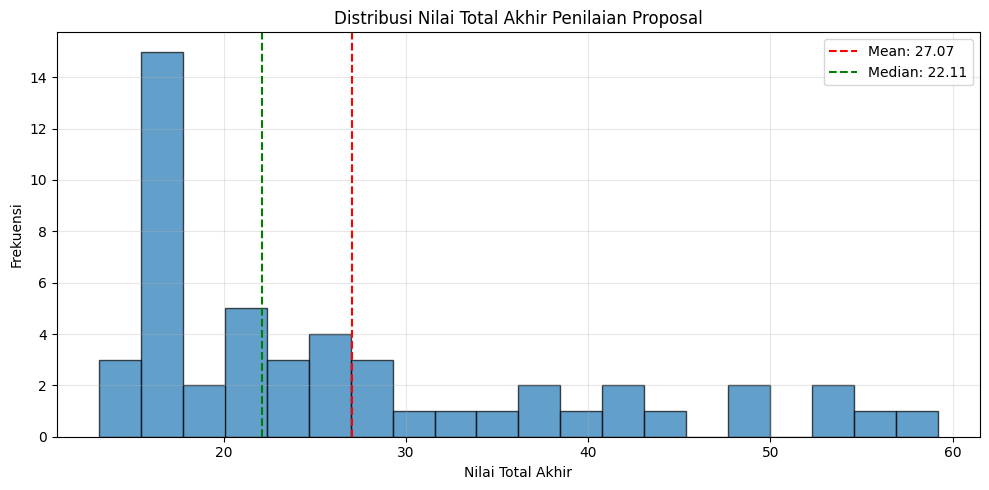


✅ Nilai total akhir range: 13.16 - 59.19


In [43]:
# Bobot penilaian sesuai kriteria (dalam desimal)
# Disesuaikan dengan KRITERIA_MAPPING yang baru
BOBOT_KRITERIA = {
    'latar_belakang': 0.05,      # 5%
    'deskripsi_usaha': 0.85,     # 85% (gabungan: noble_purpose 10% + konsumen 10% + inovasi 25% + pemasaran 15% + sumber_daya 15% + keuangan 10%)
    'rab': 0.10                  # 10%
}
# Total = 100%

# Hitung bobot untuk setiap kriteria
for kriteria, bobot in BOBOT_KRITERIA.items():
    skor_col = f'skor_{kriteria}'
    bobot_col = f'bobot_{kriteria}'
    
    if skor_col in df_clean.columns:
        # Bobot = (Skor / 100) * Bobot_Persentase * 100
        # Hasilnya dalam skala 0-bobot_max (misal 0-5 untuk latar belakang)
        df_clean[bobot_col] = (df_clean[skor_col] * bobot).round(2)

# Hitung nilai total akhir (penjumlahan semua bobot)
bobot_columns = [col for col in df_clean.columns if col.startswith('bobot_')]
df_clean['nilai_total_akhir'] = df_clean[bobot_columns].sum(axis=1).round(2)

print("="*60)
print("DISTRIBUSI NILAI TOTAL AKHIR")
print("="*60)
print(df_clean['nilai_total_akhir'].describe())

# Visualisasi distribusi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_clean['nilai_total_akhir'], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(df_clean['nilai_total_akhir'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_clean["nilai_total_akhir"].mean():.2f}')
plt.axvline(df_clean['nilai_total_akhir'].median(), color='green', linestyle='--', 
            label=f'Median: {df_clean["nilai_total_akhir"].median():.2f}')
plt.xlabel('Nilai Total Akhir')
plt.ylabel('Frekuensi')
plt.title('Distribusi Nilai Total Akhir Penilaian Proposal')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Nilai total akhir range: {df_clean['nilai_total_akhir'].min():.2f} - {df_clean['nilai_total_akhir'].max():.2f}")

### Feature 9: Buat Dataset Penilaian IndoBERT

DISTRIBUSI REKOMENDASI SISTEM
        Rekomendasi  Jumlah  Persentase (%)
            Ditolak      46            92.0
Perlu Review Manual       4             8.0


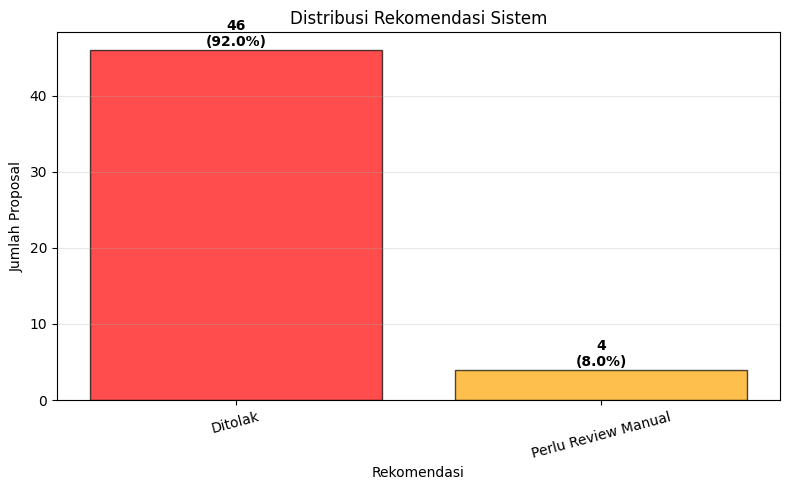

In [44]:
# Threshold untuk rekomendasi sistem
# Sesuaikan threshold berdasarkan standar seleksi

def generate_recommendation(nilai_total):
    """
    Generate rekomendasi berdasarkan nilai total akhir:
    - >= 70: Lolos Seleksi
    - 50-69: Perlu Review Manual
    - < 50: Ditolak
    """
    if nilai_total >= 70:
        return "Lolos Seleksi"
    elif nilai_total >= 50:
        return "Perlu Review Manual"
    else:
        return "Ditolak"

df_clean['rekomendasi_sistem'] = df_clean['nilai_total_akhir'].apply(generate_recommendation)

# Tambahkan timestamp waktu penilaian
from datetime import datetime
df_clean['waktu_penilaian'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Statistik rekomendasi
print("="*60)
print("DISTRIBUSI REKOMENDASI SISTEM")
print("="*60)
recommendation_counts = df_clean['rekomendasi_sistem'].value_counts()
recommendation_pct = (recommendation_counts / len(df_clean) * 100).round(2)

rekomendasi_summary = pd.DataFrame({
    'Rekomendasi': recommendation_counts.index,
    'Jumlah': recommendation_counts.values,
    'Persentase (%)': recommendation_pct.values
})

print(rekomendasi_summary.to_string(index=False))

# Visualisasi
plt.figure(figsize=(8, 5))
colors = {'Lolos Seleksi': 'green', 'Perlu Review Manual': 'orange', 'Ditolak': 'red'}
bar_colors = [colors.get(x, 'gray') for x in recommendation_counts.index]

plt.bar(recommendation_counts.index, recommendation_counts.values, color=bar_colors, alpha=0.7, edgecolor='black')
plt.xlabel('Rekomendasi')
plt.ylabel('Jumlah Proposal')
plt.title('Distribusi Rekomendasi Sistem')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

for i, (label, count) in enumerate(zip(recommendation_counts.index, recommendation_counts.values)):
    pct = (count / len(df_clean) * 100)
    plt.text(i, count + 0.5, f'{count}\n({pct:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Feature 10: Export Dataset Penilaian

In [21]:
# Kolom untuk dataset penilaian sesuai spesifikasi
# Disesuaikan dengan KRITERIA_MAPPING yang baru (3 kriteria)
penilaian_columns = [
    # IDs
    'id_tenant',
    
    # Skor dan Bobot per Kriteria (sesuai dengan kriteria baru)
    'skor_latar_belakang', 'bobot_latar_belakang',
    'skor_deskripsi_usaha', 'bobot_deskripsi_usaha',
    'skor_rab', 'bobot_rab',
    
    # Hasil Akhir
    'nilai_total_akhir',
    'rekomendasi_sistem',
    'waktu_penilaian'
]

# Buat ID penilaian dan id_tenant jika belum ada
df_clean['id_penilaian'] = range(1, len(df_clean) + 1)

if 'id_tenant' not in df_clean.columns:
    # Generate dummy id_tenant (nanti bisa diganti dengan data asli)
    df_clean['id_tenant'] = range(1000, 1000 + len(df_clean))
    print("⚠️ id_tenant tidak ditemukan, generate dummy ID (1000+)")

# Pilih kolom untuk dataset penilaian
available_penilaian_cols = ['id_penilaian'] + [col for col in penilaian_columns if col in df_clean.columns]
df_penilaian = df_clean[available_penilaian_cols].copy()

# Tampilkan info dataset
print("="*60)
print("DATASET PENILAIAN INDOBERT")
print("="*60)
print(f"Total records: {len(df_penilaian)}")
print(f"Total columns: {len(df_penilaian.columns)}")
print("\nKolom dataset:")
for i, col in enumerate(df_penilaian.columns, 1):
    dtype = df_penilaian[col].dtype
    print(f"{i:2d}. {col:30s} ({dtype})")

# Cek summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS - NILAI PENILAIAN")
print("="*60)
numeric_cols = df_penilaian.select_dtypes(include=[np.number]).columns
print(df_penilaian[numeric_cols].describe().round(2))

# Sample data
print("\n" + "="*60)
print("SAMPLE DATA (5 ROWS)")
print("="*60)
df_penilaian.head()

DATASET PENILAIAN INDOBERT
Total records: 50
Total columns: 11

Kolom dataset:
 1. id_penilaian                   (int64)
 2. id_tenant                      (int64)
 3. skor_latar_belakang            (float64)
 4. bobot_latar_belakang           (float64)
 5. skor_deskripsi_usaha           (float64)
 6. bobot_deskripsi_usaha          (float64)
 7. skor_rab                       (float64)
 8. bobot_rab                      (float64)
 9. nilai_total_akhir              (float64)
10. rekomendasi_sistem             (object)
11. waktu_penilaian                (object)

SUMMARY STATISTICS - NILAI PENILAIAN
       id_penilaian  id_tenant  skor_latar_belakang  bobot_latar_belakang  \
count         50.00      50.00                50.00                 50.00   
mean          25.50      25.50                31.22                  1.56   
std           14.58      14.58                 9.06                  0.45   
min            1.00       1.00                 9.12                  0.46   
25%      

,id_penilaian,id_tenant,skor_latar_belakang,bobot_latar_belakang,skor_deskripsi_usaha,bobot_deskripsi_usaha,skor_rab,bobot_rab,nilai_total_akhir,rekomendasi_sistem,waktu_penilaian
0,1,1,40.19,2.01,56.76,48.25,43.34,4.33,54.59,Perlu Review Manual,2025-12-16 11:08:48
1,2,2,34.96,1.75,60.07,51.06,41.95,4.20,57.01,Perlu Review Manual,2025-12-16 11:08:48
2,3,3,34.82,1.74,50.84,43.21,39.67,3.97,48.92,Ditolak,2025-12-16 11:08:48
3,4,4,40.43,2.02,55.48,47.16,47.23,4.72,53.90,Perlu Review Manual,2025-12-16 11:08:48
4,5,5,34.54,1.73,48.29,41.05,9.26,0.93,43.71,Ditolak,2025-12-16 11:08:48


In [45]:
df_clean.head()

,id_segmentasi,id_tenant,txt_latar_belakang,txt_noble_purpose,txt_konsumen,txt_produk_inovatif,txt_strategi_pemasaran,txt_sumber_daya,txt_keuangan_narrative,txt_rab_narrative,...,feat_structure_rab,skor_latar_belakang,skor_deskripsi_usaha,skor_rab,bobot_latar_belakang,bobot_deskripsi_usaha,bobot_rab,nilai_total_akhir,rekomendasi_sistem,waktu_penilaian
0,1,1,Antrian di puskesmas daerah Bandung rata-rata ...,Meningkatkan akses kesehatan masyarakat yang m...,Target utama adalah pasien BPJS di area urban ...,"Aplikasi ""AntriSehat"" menggunakan algoritma es...",Kerjasama B2G dengan Dinas Kesehatan Kota Band...,Tim terdiri dari 1 Fullstack Dev (Ex-Tokopedia...,Proyeksi pendapatan dari biaya langganan klini...,Dana 50 juta akan digunakan untuk sewa cloud s...,...,30,40.19,56.48,46.13,2.01,48.01,4.61,54.63,Perlu Review Manual,2025-12-16 11:16:31
1,2,2,Meningkatnya obesitas di kalangan mahasiswa ka...,Menyediakan makanan bergizi seimbang dengan ha...,Mahasiswa universitas di Jatinangor dan Bandun...,"Catering ""SaladIn Aja"" dengan dressing rendah ...","Bundling paket mingguan diskon 10%, kolaborasi...","Dapur produksi milik sendiri, 2 juru masak ber...","HPP per porsi Rp 12.000, harga jual Rp 20.000....",Dana hibah untuk pembelian chiller kapasitas b...,...,30,34.96,62.86,40.08,1.75,53.43,4.01,59.19,Perlu Review Manual,2025-12-16 11:16:31
2,3,3,Orang malas mencuci sepatu sendiri karena sibu...,Membantu orang tampil percaya diri dengan alas...,Mahasiswa yang aktif organisasi dan karyawan s...,"Jasa cuci sepatu ""DeepClean"" menggunakan sabun...",Instagram ads menargetkan interest sneakerhead...,Saya sendiri sebagai owner (sertifikasi shoe c...,Omzet rata-rata 3 juta per bulan dengan profit...,Butuh modal untuk beli mesin pengering sepatu ...,...,30,34.82,50.84,39.67,1.74,43.21,3.97,48.92,Ditolak,2025-12-16 11:16:31
3,4,4,Tanah pertanian di Lembang makin kritis akibat...,Mengembalikan kesuburan tanah ibu pertiwi dan ...,Petani sayur hortikultura di Jawa Barat dan ko...,"Pupuk cair hayati ""SuburMax"" hasil fermentasi ...","Penyuluhan gratis ke kelompok tani (Gapoktan),...",Kerjasama dengan lab tanah IPB untuk QC. Akses...,"Biaya produksi Rp 5.000/liter, dijual Rp 25.00...","RAB 100 juta: 40% mesin pencacah limbah, 30% t...",...,30,43.43,55.27,50.23,2.17,46.98,5.02,54.17,Perlu Review Manual,2025-12-16 11:16:31
4,5,5,Banyak limbah kain perca dari konveksi yang di...,Mengurangi limbah tekstil dengan mengubahnya m...,Anak muda usia 18-25 tahun yang suka fashion u...,Tas totebag dan pouch dari kain perca dengan d...,Jual di Instagram dan TikTok Shop dengan konte...,Mesin jahit satu buah dan kemampuan menjahit d...,Belum ada laporan keuangan detail karena baru ...,"Beli kain perca karungan, benang, dan jarum ja...",...,30,34.54,48.29,9.26,1.73,41.05,0.93,43.71,Ditolak,2025-12-16 11:16:31


In [62]:
output_penilaian_path = 'dataset/preprocessed/dataset_clean_indobert.csv'

df_clean.to_csv(output_penilaian_path, index=False)
print(f"✅ Dataset penilaian disimpan di: {output_penilaian_path}")

✅ Dataset penilaian disimpan di: dataset/preprocessed/dataset_clean_indobert.csv


In [22]:
# Export dataset penilaian
import os


output_penilaian_path = 'dataset/preprocessed/dataset_penilaian_indobert.csv'

df_penilaian.to_csv(output_penilaian_path, index=False)

print("="*60)
print("EXPORT DATASET PENILAIAN")
print("="*60)
print(f"✅ Dataset tersimpan: {output_penilaian_path}")
print(f"   Total rows: {len(df_penilaian)}")
print(f"   Total columns: {len(df_penilaian.columns)}")
print(f"   File size: {os.path.getsize(output_penilaian_path) / 1024:.2f} KB")

# Export summary report
summary_report = {
    'Total Proposal': len(df_penilaian),
    'Lolos Seleksi': len(df_penilaian[df_penilaian['rekomendasi_sistem'] == 'Lolos Seleksi']),
    'Perlu Review Manual': len(df_penilaian[df_penilaian['rekomendasi_sistem'] == 'Perlu Review Manual']),
    'Ditolak': len(df_penilaian[df_penilaian['rekomendasi_sistem'] == 'Ditolak']),
    'Nilai Rata-rata': df_penilaian['nilai_total_akhir'].mean(),
    'Nilai Tertinggi': df_penilaian['nilai_total_akhir'].max(),
    'Nilai Terendah': df_penilaian['nilai_total_akhir'].min()
}

print("\n" + "="*60)
print("SUMMARY REPORT PENILAIAN")
print("="*60)
for key, value in summary_report.items():
    if isinstance(value, float):
        print(f"{key:25s}: {value:.2f}")
    else:
        print(f"{key:25s}: {value}")

print("\n✅ Feature engineering untuk penilaian proposal selesai!")
print("📊 Dataset siap untuk training IndoBERT atau analisis lebih lanjut")

EXPORT DATASET PENILAIAN
✅ Dataset tersimpan: dataset/preprocessed/dataset_penilaian_indobert.csv
   Total rows: 50
   Total columns: 11
   File size: 3.79 KB

SUMMARY REPORT PENILAIAN
Total Proposal           : 50
Lolos Seleksi            : 0
Perlu Review Manual      : 4
Ditolak                  : 46
Nilai Rata-rata          : 26.71
Nilai Tertinggi          : 57.01
Nilai Terendah           : 13.23

✅ Feature engineering untuk penilaian proposal selesai!
📊 Dataset siap untuk training IndoBERT atau analisis lebih lanjut


## 6. Prepare Labels (Jika Ada)

Jika dataset memiliki label untuk verifikasi (misalnya: 'status_verifikasi', 'label_kelengkapan'), kita akan prepare di sini.

In [23]:
# Cek kolom yang mungkin label
potential_label_cols = [col for col in df_clean.columns 
                        if any(keyword in col.lower() for keyword in 
                              ['status', 'label', 'class', 'category', 'verification', 'valid'])]

print("Kolom potensial sebagai label:")
if potential_label_cols:
    for col in potential_label_cols:
        print(f"- {col}")
        print(f"  Unique values: {df_clean[col].nunique()}")
        print(f"  Values: {df_clean[col].unique()[:5]}")
        print()
else:
    print("⚠️ Tidak ada kolom label ditemukan.")
    print("Dataset ini mungkin untuk unsupervised learning atau perlu label manual.")

Kolom potensial sebagai label:
- parsing_status
  Unique values: 2
  Values: ['Success' 'Partial']



## 7. Train-Test Split

In [24]:
# Split data untuk training dan testing
# Jika ada label, gunakan stratified split

# Untuk contoh, kita buat split 80:20
train_df, test_df = train_test_split(
    df_clean, 
    test_size=0.2, 
    random_state=42,
    # stratify=df_clean['label_column'] if 'label_column' in df_clean.columns else None
)

print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Total data: {len(df_clean)}")
print(f"Training set: {len(train_df)} ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"Test set: {len(test_df)} ({len(test_df)/len(df_clean)*100:.1f}%)")

# Reset index
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("\n✅ Data split selesai!")

TRAIN-TEST SPLIT
Total data: 50
Training set: 40 (80.0%)
Test set: 10 (20.0%)

✅ Data split selesai!


## 8. Prepare untuk IndoBERT Tokenization

IndoBERT menggunakan tokenizer khusus. Kita akan prepare teks dalam format yang siap untuk tokenization.

In [25]:
# Statistik panjang teks untuk menentukan max_length tokenizer
text_lengths = df_clean['full_proposal'].str.split().str.len()

print("="*60)
print("STATISTIK PANJANG TEKS (dalam kata)")
print("="*60)
print(f"Mean: {text_lengths.mean():.0f}")
print(f"Median: {text_lengths.median():.0f}")
print(f"Std: {text_lengths.std():.0f}")
print(f"Min: {text_lengths.min():.0f}")
print(f"Max: {text_lengths.max():.0f}")

# Rekomendasi max_length
percentile_95 = text_lengths.quantile(0.95)
print(f"\n95th percentile: {percentile_95:.0f}")
print(f"\nRekomendasi max_length untuk tokenizer: {int(percentile_95)}")
print("(Akan truncate 5% data terpanjang)")

# BERT biasanya memiliki limit 512 tokens
if percentile_95 > 512:
    print("\n⚠️ Warning: 95th percentile > 512 tokens (BERT limit)")
    print("Pertimbangkan chunking atau summarization untuk teks panjang")

STATISTIK PANJANG TEKS (dalam kata)
Mean: 80
Median: 71
Std: 27
Min: 52
Max: 173

95th percentile: 136

Rekomendasi max_length untuk tokenizer: 136
(Akan truncate 5% data terpanjang)


## 9. Export Preprocessed Data

In [26]:
# Export ke CSV untuk digunakan di training script
output_dir = 'dataset/preprocessed/'

# Buat directory jika belum ada
import os
os.makedirs(output_dir, exist_ok=True)

# Export train dan test
train_df.to_csv(f'{output_dir}train_preprocessed.csv', index=False)
test_df.to_csv(f'{output_dir}test_preprocessed.csv', index=False)

# Export full dataset juga
df_clean.to_csv(f'{output_dir}full_preprocessed.csv', index=False)

print("="*60)
print("DATA EXPORT SUMMARY")
print("="*60)
print(f"✅ Training data: {output_dir}train_preprocessed.csv ({len(train_df)} rows)")
print(f"✅ Test data: {output_dir}test_preprocessed.csv ({len(test_df)} rows)")
print(f"✅ Full data: {output_dir}full_preprocessed.csv ({len(df_clean)} rows)")
print("\nKolom utama yang tersimpan:")
print("- full_proposal: Teks gabungan semua bagian (cleaned)")
print("- Individual text columns: Setiap bagian proposal (cleaned)")
print("- Original columns: Kolom lain dari dataset original")

DATA EXPORT SUMMARY
✅ Training data: dataset/preprocessed/train_preprocessed.csv (40 rows)
✅ Test data: dataset/preprocessed/test_preprocessed.csv (10 rows)
✅ Full data: dataset/preprocessed/full_preprocessed.csv (50 rows)

Kolom utama yang tersimpan:
- full_proposal: Teks gabungan semua bagian (cleaned)
- Individual text columns: Setiap bagian proposal (cleaned)
- Original columns: Kolom lain dari dataset original


## 10. Next Steps - IndoBERT Implementation

Setelah preprocessing selesai, langkah selanjutnya untuk training dengan IndoBERT:

### A. Install Dependencies
```bash
pip install transformers torch
```

### B. Load IndoBERT Model
```python
from transformers import BertTokenizer, BertForSequenceClassification

# Load IndoBERT tokenizer dan model
model_name = "indolem/indobert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
```

### C. Tokenize Data
```python
# Tokenize teks
train_encodings = tokenizer(
    train_df['full_proposal'].tolist(),
    truncation=True,
    padding=True,
    max_length=512
)
```

### D. Create Dataset & DataLoader
```python
import torch
from torch.utils.data import Dataset, DataLoader

class ProposalDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

train_dataset = ProposalDataset(train_encodings, train_labels)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
```

### E. Training Loop
```python
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

for epoch in range(3):
    for batch in train_loader:
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
```

### F. Evaluation & Prediction
```python
model.eval()
with torch.no_grad():
    predictions = model(**test_encodings)
```

---

## Summary

### ✅ Preprocessing Steps Completed:

1. **Data Loading**: Dataset loaded dengan {n_rows} proposals
2. **Missing Values**: Handled dengan empty string
3. **Text Cleaning**: 
   - Removed URLs, emails, phone numbers
   - Normalized whitespace
   - Removed special characters
4. **Text Combination**: Gabungkan semua bagian proposal dengan separator
5. **Train-Test Split**: 80% train, 20% test
6. **Export**: Data tersimpan di `dataset/preprocessed/`

### 📊 Dataset Stats:
- Total proposals: {n_rows}
- Text sections: {n_sections}
- Avg length: {avg_length} words
- Max length: {max_length} words

### 🎯 Ready for IndoBERT:
Data sudah siap untuk:
- Tokenization dengan IndoBERT tokenizer
- Fine-tuning untuk verifikasi administratif
- Classification atau regression tasks